# YOLOv2

YOLOv2 kế thừa và phát triển tiếp từ YOLOv1 với hàng loạt những sự thay đổi và cải tiến mới để cho ra một phiên bản nâng cấp vừa tốt hơn, nhanh hơn, và còn mạnh mẽ hơn (YOLO9000). Những thay đổi này bao gồm việc tận dụng lại các công trình làm việc trước đó, đồng thời sáng tạo ra các phương pháp mới. Mô hình cải tiến YOLOv2 đạt được kết quả SOTA các tập dữ liệu PASCAL VOC và COCO, vượt trội hơn hẳn các phương pháp khác như Faster R-CNN + ResNet

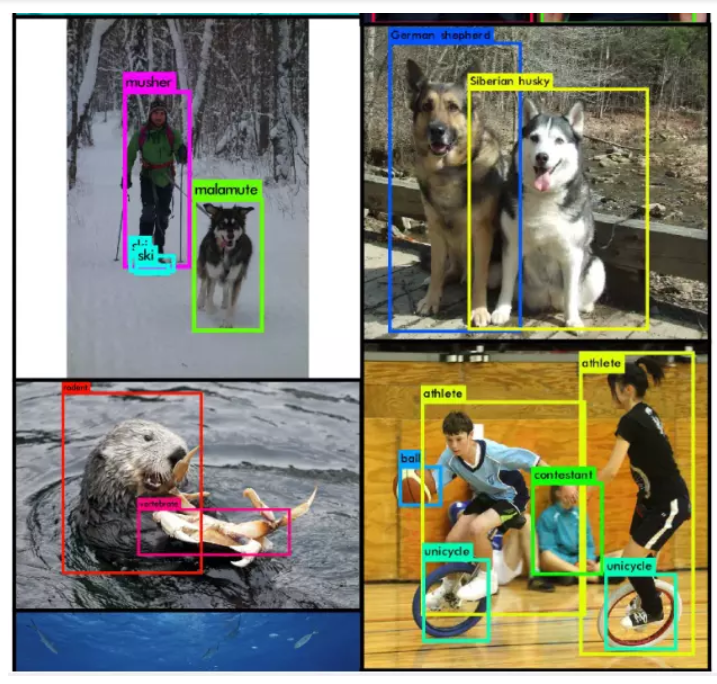

### Ưu điểm so với YOLOv1

Nhắc lại rằng, YOLOv1 có một số nhược điểm so với các hệ thống detection hàng đầu ở thời điểm đó:
- YOLO có Localization Errors khá cao - nó gặp khó khăn trong việc định vị vật thể chính xác.
- YOLO cũng có Recall khá thấp so với các phương pháp region proposal.

Vì thế, YOLOv2 tập trung chủ yếu vào việc cải thiện recall và localization trong khi vẫn duy trì được classification accuracy. Những sự thay đổi có:
- Batch Normalization: giúp tăng tốc độ hội tụ và cải thiện độ chính xác của mô hình.
- High Resolution Classifier: sử dụng một mạng CNN với độ phân giải cao để tạo ra các feature map với độ chính xác cao.
- Convolutional With Anchor Boxes: thay vì sử dụng grid cell như YOLOv1, YOLOv2 sử dụng anchor boxes để dự đoán bounding box.

### Anchor boxes

YOLOv2 cải tiến điều này bằng việc tận dụng lại ý tưởng về Anchor Box trong Faster R-CNN. Việc làm này giúp network dự đoán các bounding box dễ dàng hơn. Khi đó, YOLOv2 sẽ loại bỏ 2 Fully Connected Layers cuối cùng của YOLOv1, vì việc dự đoán bounding box từ các anchor box và confidence score chỉ cần các Convolutional Layers. YOLOv2 cũng loại bỏ Pooling Layer để output của các Convolutional Layers có độ phân giải cao hơn.

Ngoài ra, YOLOv2 điều chỉnh network để dự đoán trên bức ảnh đầu vào có kích thước 416 × 416 thay vì 448 × 448. Lý do là vì ta muốn feature map có số lượng ô lẻ, khi đó sẽ có một grid cell nằm ở trung tâm của feature map. Vì các object, đặc biệt là các object lớn thường có xu hướng nằm ở trung tâm của bức ảnh, nên sẽ tốt hơn khi có một ô nằm ở tâm của bức ảnh để dự đoán các object như thế thay vì 4 grid cell đều nằm liền kề các object đó. Vì vậy ouput feature map sẽ là 13 x 13

Việc sử dụng anchor box trong YOLOv2 sẽ làm tăng số lượng bounding box được dự đoán lên đến hơn 1000 box/ảnh (nhiều hơn hẳn so với YOLOv1 với chỉ 98 box mỗi ảnh). Điều này làm giảm accuracy đi một lượng nhỏ.

#### Ước lượng Anchor

Ban đầu, mô hình sẽ khởi tạo ngẫu nhiên một số lượng anchor box. Nhưng mô hình sẽ mất nhiều thời gian hơn khi phải điều chỉnh số lượng hợp lý, vì thế mô hình sẽ sử dụng k-means clustering để ước lượng lại các anchor box sao cho chúng phù hợp với dữ liệu thực tế nhất.

Cách thức ước lượng anchor box như sau:
- Ta khởi tạo ngẫu nhiên k anchor box làm k centroids.
- Với mỗi anchor, ta tính IOU của từng anchor với từng bounding box trong tập dữ liệu.
- Vì ta muốn anchor có IOU tốt, nên ta có distance metric:
$$d(box, centroid) = 1 - IOU(box, centroid)$$
Với $0 \leq IOU \leq 1$,  hai box có IOU = 1 nghĩa là chúng trùng nhau, và ngược lại. (Sẽ là hiện tượng overlapping, và ta sẽ có cách giải quyết sau)
- Sau khi tính được distance metric, ta gắn các bbox về các centroid gần nhất.
- Lặp lại quá trình trên cho đến khi không có sự thay đổi nào nữa.

### Architecture

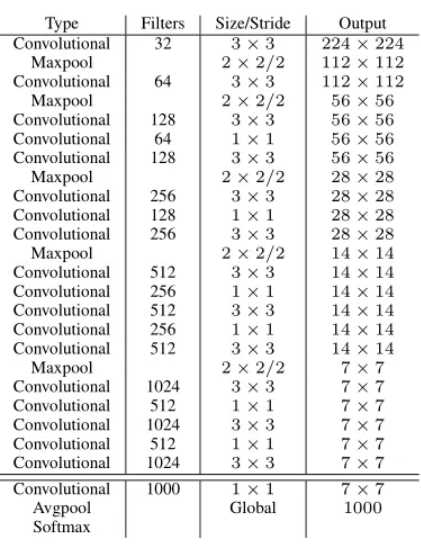